<a href="https://colab.research.google.com/github/Chetan3794/Heart-Disease-Prediction-Classification/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b>Question)

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

#<b>Answer)



<b>1) Importing Required Libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

#Models import
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import xgboost as xgb


#constants
np.random.seed(0)
NFOLDS=5
SEED=0

<b>Importing Data set

In [103]:
risk = pd.read_csv('data_cardiovascular_risk.csv')
risk=risk.drop(['id'], axis=1) #drop 'id'

<b>Display the FIRST 5 Observations

In [104]:
print('First 5 Observation')
print(risk.head())

First 5 Observation
   age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   64        2.0   F        YES         3.0     0.0                0   
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3 

<b> Display the LAST 5 Observations

In [105]:
print('Last 5 Observation')
print(risk.tail())

Last 5 Observation
      age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
3385   60        1.0   F         NO         0.0     0.0                0   
3386   46        1.0   F         NO         0.0     0.0                0   
3387   44        3.0   M        YES         3.0     0.0                0   
3388   60        1.0   M         NO         0.0     NaN                0   
3389   54        3.0   F         NO         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
3385             0         0    261.0  123.5   79.0  29.28       70.0   
3386             0         0    199.0  102.0   56.0  21.96       80.0   
3387             1         0    352.0  164.0  119.0  28.92       73.0   
3388             1         0    191.0  167.0  105.0  23.01       80.0   
3389             0         0    288.0  124.0   77.0  29.88       79.0   

      glucose  TenYearCHD  
3385    103.0           0  
3386     84.0           0  
3

<b> 2) Plotting various graphs to check the importance of various factors

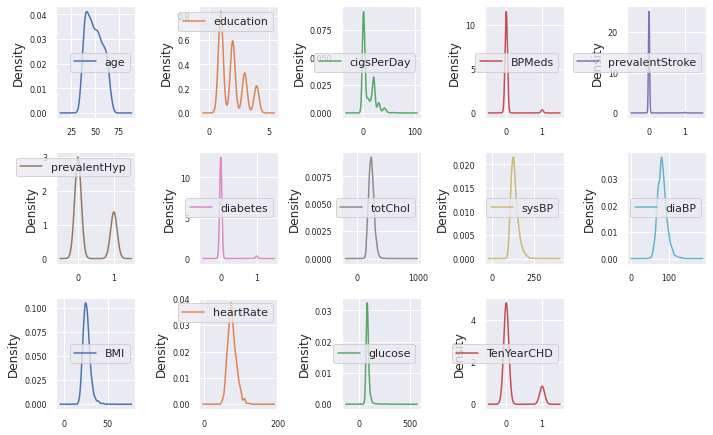

In [106]:
risk.plot(kind='density' , subplots=True , layout=(5,5) , sharex=False ,
          fontsize=8 , figsize=(10,10))
plt.tight_layout()
plt.title('Density map', y=1.1)
plt.show()


<b> Plotting the data distribution

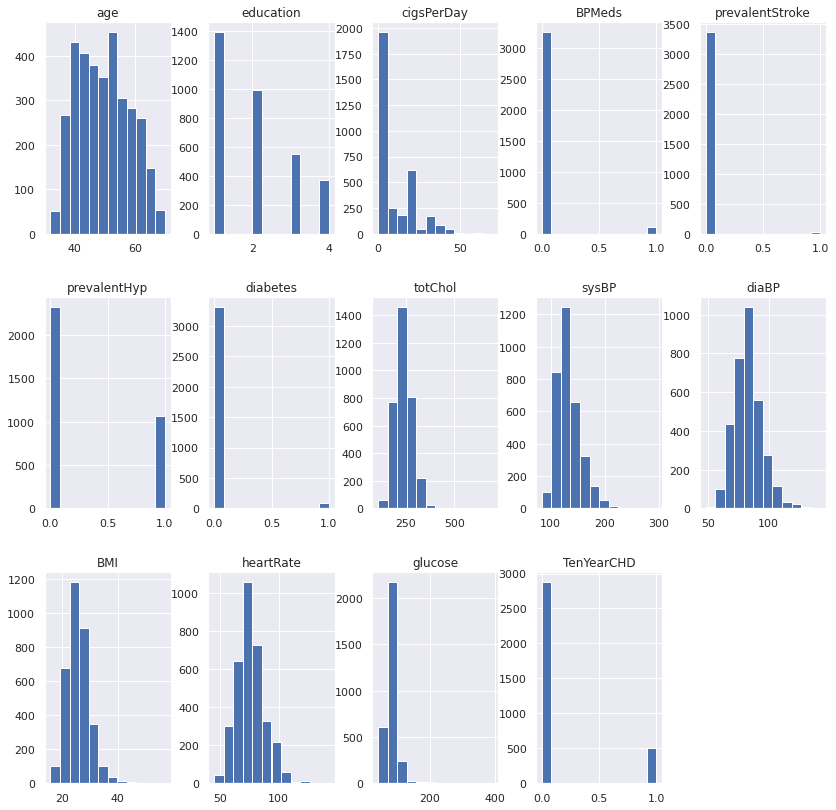

In [107]:
import matplotlib.pyplot as mpl

mpl.rcParams['font.size'] = 6
risk.hist(figsize=(14, 14), layout=(3, 5), bins=12)
plt.title('Features Histogram')
plt.show()

<b> Conclusion:

1) From the plots it is clearly visible that age group between 35 to 60 has been considered for heart disease studies

2) People having 2 to 10 cigarets are less likely to occures 

3) Not much people suffered from prevalent stroke i.e previously occured stroke

4) Not much people suffered from prevalent hypertension

5) Remaining observations are telling about health conditions such as 
diabetes, total cholestrol, BMI, etc.

<b> Classifying the patients into male and female

Text(0.5, 1.0, 'Most prone gender to CHD')

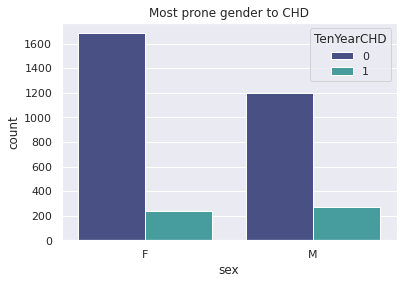

In [108]:
sns.countplot(x="sex", hue="TenYearCHD", data=risk, palette="mako")
plt.title("Most prone gender to CHD")

Conclusion---> Most of the patients in the study are found to be the females

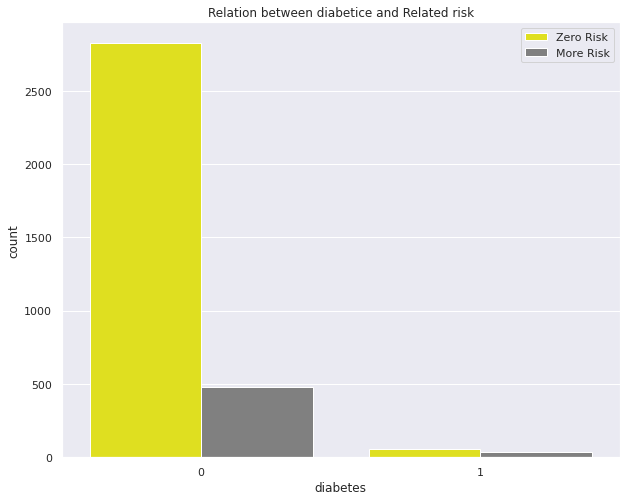

In [109]:
my_palette = {0 : 'yellow' , 1 : 'gray'}
plt.figure(figsize = (10,8))
sns.countplot(x = risk['diabetes'], hue = risk['TenYearCHD'], palette = my_palette)
plt.title("Relation between diabetice and Related risk")
plt.legend(['Zero Risk','More Risk'])
plt.show()

From above visualization, it is clearly seen that males having diabetics are more prone to CHD

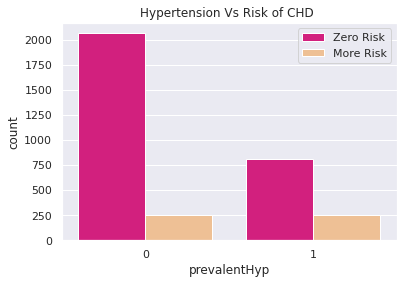

In [110]:
sns.countplot(x = risk['prevalentHyp'], hue = risk['TenYearCHD'], palette =  'Accent_r')
plt.title("Hypertension Vs Risk of CHD ")
plt.legend(['Zero Risk','More Risk'])
plt.show()

From bar graph, most of the mens with hypertension are not at risk but yes some are at serious risk. All in all, number of mens at risk are way less than those who are at no risk

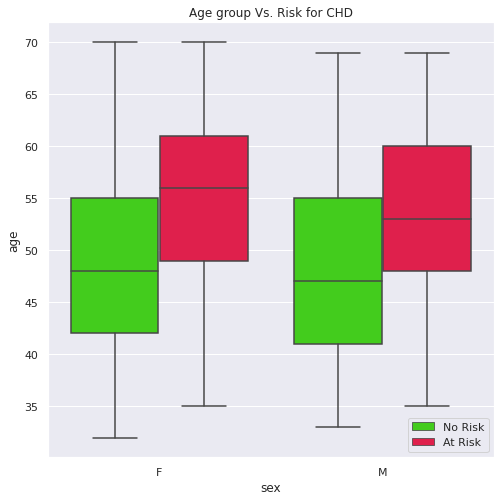

In [111]:
plt.figure(figsize = (8,8))
ax = sns.boxplot(x = risk['sex'], y = risk['age'], hue = risk['TenYearCHD'], palette = 'prism')
plt.title("Age group Vs. Risk for CHD")
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

The age group between 47 to 60 for males and 48 to 62 for females are more prone to CHD

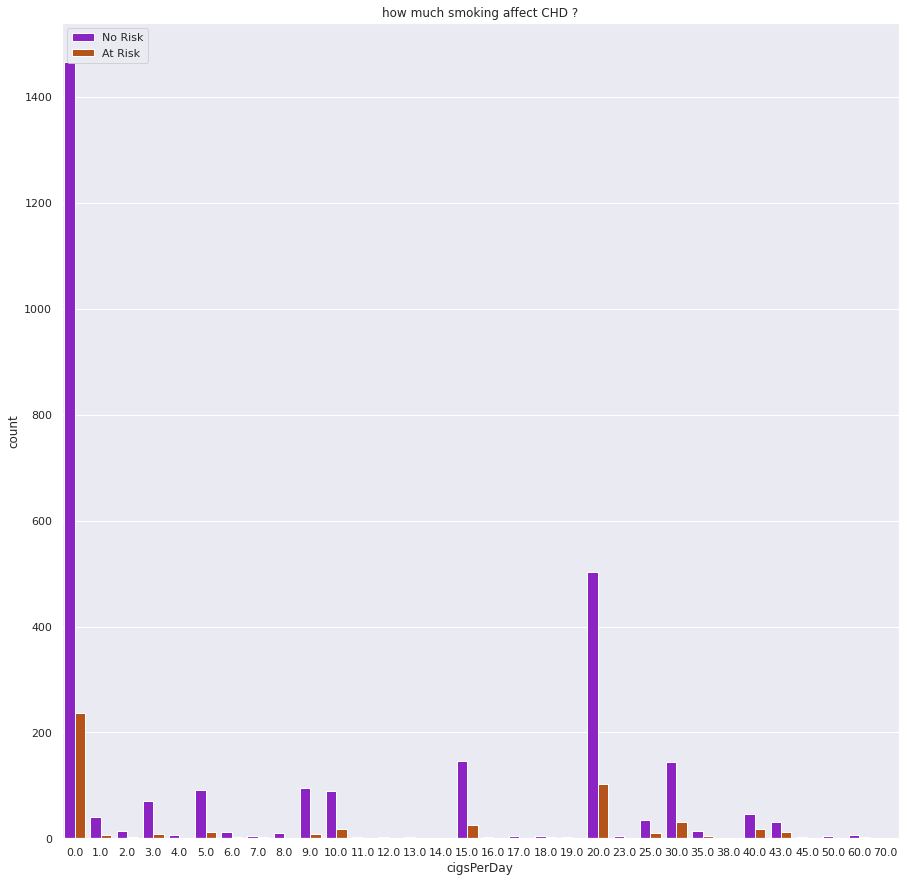

In [112]:
plt.figure(figsize = (15,15))
sns.countplot(x = risk['cigsPerDay'], hue = risk['TenYearCHD'], palette = 'gnuplot')
plt.title("how much smoking affect CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

For males as well as females CHD does not much related to CIgaretes per day but still those having more than 2 cigaretes per day are more prone to CHD

<b> 3) Lets find out the correlation between various factors

                      age  education  cigsPerDay    BPMeds  prevalentStroke  \
age              1.000000  -0.172559   -0.192335  0.124376         0.059038   
education       -0.172559   1.000000    0.011126 -0.019920        -0.034194   
cigsPerDay      -0.192335   0.011126    1.000000 -0.037080        -0.042057   
BPMeds           0.124376  -0.019920   -0.037080  1.000000         0.119402   
prevalentStroke  0.059038  -0.034194   -0.042057  0.119402         1.000000   
prevalentHyp     0.308826  -0.084817   -0.079312  0.259548         0.071652   
diabetes         0.107875  -0.052013   -0.049016  0.071316         0.010115   
totChol          0.274028  -0.020781   -0.024703  0.083299        -0.010832   
sysBP            0.404845  -0.137195   -0.100834  0.263729         0.057568   
diaBP            0.221896  -0.060801   -0.068785  0.201217         0.047235   
BMI              0.138176  -0.133313   -0.100996  0.087932         0.018602   
heartRate       -0.002596  -0.046980    0.066759  0.

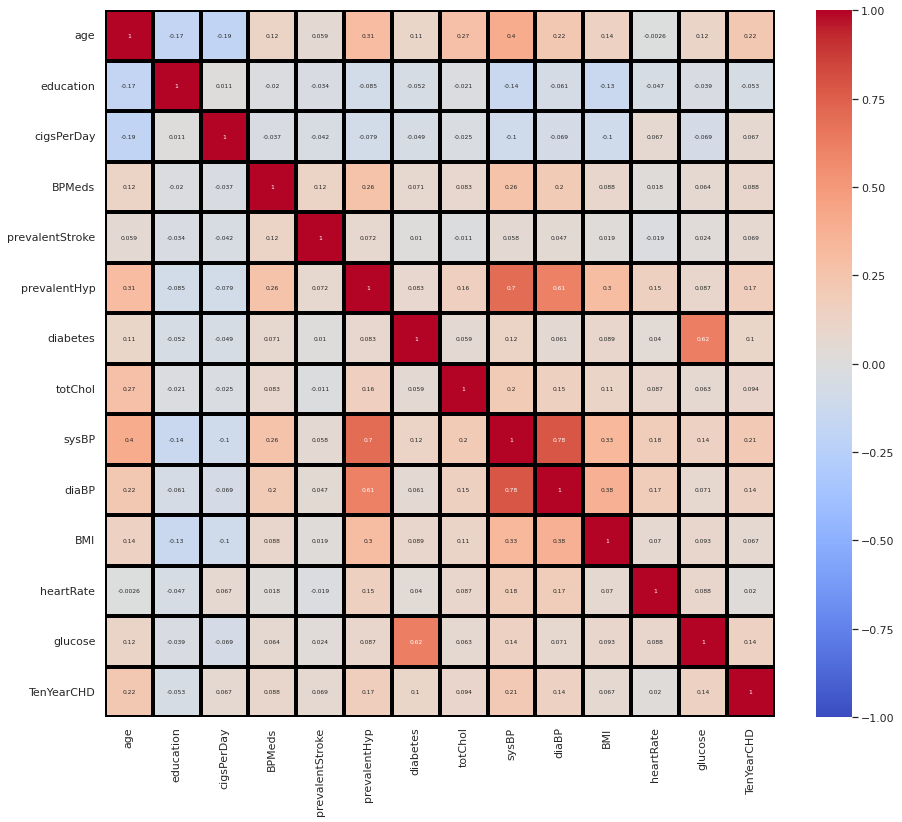

In [113]:
print(risk.corr())


plt.figure(figsize=(15, 13))


sns.heatmap(risk.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=3, linecolor='black')
plt.show()

From correlation matrix it is clearly visible that not many factors are correlated to each other but some independent variables are related to each other

<b> Now,Displaying of the Number of Variables & Number of Observations

In [114]:
print('Number of Variables')
print(risk.shape)

Number of Variables
(3390, 16)


<b> lets, display the Variable Names and their Data Types

In [115]:
print('Number of Variables Names and their Data Types')
print(risk.dtypes)

Number of Variables Names and their Data Types
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


In [116]:
risk.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [117]:
risk = risk.dropna(how ='any')

<b>Displaying the Number of Variables & Number of Observations

In [118]:
print('Number of Variables')
print(risk.shape)

Number of Variables
(2927, 16)


<b>Showing prevalance in the data set


In [119]:
risk['TenYearCHD'].value_counts(normalize=True)

0    0.848309
1    0.151691
Name: TenYearCHD, dtype: float64

<b> Detained description of data

In [120]:
risk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 1 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2927 non-null   int64  
 1   education        2927 non-null   float64
 2   sex              2927 non-null   object 
 3   is_smoking       2927 non-null   object 
 4   cigsPerDay       2927 non-null   float64
 5   BPMeds           2927 non-null   float64
 6   prevalentStroke  2927 non-null   int64  
 7   prevalentHyp     2927 non-null   int64  
 8   diabetes         2927 non-null   int64  
 9   totChol          2927 non-null   float64
 10  sysBP            2927 non-null   float64
 11  diaBP            2927 non-null   float64
 12  BMI              2927 non-null   float64
 13  heartRate        2927 non-null   float64
 14  glucose          2927 non-null   float64
 15  TenYearCHD       2927 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 388.7+ KB


In [121]:
risk.drop(labels = 'education', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [122]:
features = list(risk.columns)[1:-1]
X = risk[features]
y = risk['TenYearCHD']
X = pd.get_dummies(X,columns=['sex', 'is_smoking', 'prevalentStroke', 'prevalentHyp', 'diabetes'])
X.sample(5)

,cigsPerDay,BPMeds,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex_F,sex_M,is_smoking_NO,is_smoking_YES,prevalentStroke_0,prevalentStroke_1,prevalentHyp_0,prevalentHyp_1,diabetes_0,diabetes_1
2470,3.0,0.0,217.0,169.0,111.0,32.54,65.0,78.0,1,0,0,1,1,0,1,0,1,0
826,5.0,0.0,310.0,128.5,82.0,25.36,70.0,85.0,1,0,0,1,1,0,1,0,1,0
3139,0.0,0.0,186.0,155.0,102.0,24.38,81.0,75.0,1,0,1,0,1,0,0,1,1,0
2278,0.0,0.0,240.0,110.5,66.0,24.09,67.0,80.0,1,0,1,0,1,0,1,0,1,0
346,15.0,0.0,272.0,127.5,79.5,26.37,78.0,66.0,0,1,0,1,1,0,1,0,1,0


<b>Display the First 5 Observations


In [123]:
print('First 5 Observation')
print(X.head())

First 5 Observation
   cigsPerDay  BPMeds  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
1         0.0     0.0    212.0  168.0   98.0  29.77       72.0     75.0   
2        10.0     0.0    250.0  116.0   71.0  20.35       88.0     94.0   
3        20.0     0.0    233.0  158.0   88.0  28.26       68.0     94.0   
4        30.0     0.0    241.0  136.5   85.0  26.42       70.0     77.0   
5         0.0     0.0    272.0  182.0  121.0  32.80       85.0     65.0   

   sex_F  sex_M  is_smoking_NO  is_smoking_YES  prevalentStroke_0  \
1      0      1              1               0                  1   
2      1      0              0               1                  1   
3      0      1              0               1                  1   
4      1      0              0               1                  1   
5      1      0              1               0                  1   

   prevalentStroke_1  prevalentHyp_0  prevalentHyp_1  diabetes_0  diabetes_1  
1                  0               

<b>Display the First 5 Observations

In [124]:
print('First 5 Observation')
print(y.head())

First 5 Observation
1    0
2    0
3    1
4    0
5    1
Name: TenYearCHD, dtype: int64


<b>Display the Number of Variables & Number of Observations

In [125]:
print('Number of Variables')
print(X.shape)

Number of Variables
(2927, 18)


<b>Test-Train split


In [126]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.15, stratify= y , random_state = 42) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2487, 18)
(440, 18)
(2487,)
(440,)


In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<b> DecisionTreeClassifier


In [128]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
cmdt=confusion_matrix(y_test, pred)
# accuracy
accuracy_DT = accuracy_score(pred, y_test)*100
print("1.Decision Tree Accuracy")
print(accuracy_DT)
print("Decision Tree  classification_report")
print(classification_report(pred, y_test, labels=None))
print("Decision Tree  confusion_matrix")
print(cmdt)

1.Decision Tree Accuracy
73.18181818181819
Decision Tree  classification_report
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       363
           1       0.19      0.17      0.18        77

    accuracy                           0.73       440
   macro avg       0.51      0.51      0.51       440
weighted avg       0.72      0.73      0.72       440

Decision Tree  confusion_matrix
[[309  64]
 [ 54  13]]


<b>Decision tree Classifier Hyperparameter tunning


In [129]:
DT= DecisionTreeClassifier()
DT_param = {'max_depth':np.arange(10,40,2), 'max_leaf_nodes':np.arange(50,150,10)}
DT = GridSearchCV(DT, param_grid= DT_param, scoring ='f1' , cv = 5)
DT.fit(X_train,y_train)
print(DT.best_params_)
DT = DT.best_estimator_

{'max_depth': 18, 'max_leaf_nodes': 130}


In [130]:
y_pred_test_DT = DT.predict(X_test)
y_pred_train_DT = DT.predict(X_train)
print("1.Decision Tree Accuracy with hypertuning")
print('f1 score on train set:',f1_score(y_train,y_pred_train_DT) )

print('Auc_score Train:', roc_auc_score(y_train,y_pred_train_DT))
# Recall is an important metric in this case
print('Recall Score:', recall_score(y_test,y_pred_test_DT))
# Since its binary classiffication, lets check the confusion matrix

print('Confusion matrix model\n', confusion_matrix(y_test,y_pred_test_DT,labels=[1,0]) + confusion_matrix(y_train,y_pred_train_DT,labels=[1,0]))

1.Decision Tree Accuracy with hypertuning
f1 score on train set: 0.7003367003367003
Auc_score Train: 0.7737293675437164
Recall Score: 0.16417910447761194
Confusion matrix model
 [[ 219  225]
 [  44 2439]]


<b>RandomForestClassifier

In [131]:
rdF=RandomForestClassifier(n_estimators=250, max_depth=50,random_state=45)
rdF.fit(X_train,y_train)
pred = rdF.predict(X_test)
accuracy_RF = accuracy_score(pred, y_test)*100
cmrf=confusion_matrix(y_test, pred)
print("2.Random Forest Accuracy")
print(accuracy_RF)
print("Random Forest classification_report")
print(classification_report(pred, y_test, labels=None))
print("Random Forest confusion_matrix")
print(cmrf)

2.Random Forest Accuracy
84.0909090909091
Random Forest classification_report
              precision    recall  f1-score   support

           0       0.99      0.85      0.91       433
           1       0.03      0.29      0.05         7

    accuracy                           0.84       440
   macro avg       0.51      0.57      0.48       440
weighted avg       0.97      0.84      0.90       440

Random Forest confusion_matrix
[[368   5]
 [ 65   2]]


<b> XGBClassifier


In [132]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, y_train)
pred=xgb_clf.predict(X_test)
cmxg=confusion_matrix(y_test, pred)

accuracy_XGB = accuracy_score(y_test,pred)*100
print("3. XGBClassifier Accuracy")
print(accuracy_XGB)
print("XGBClassifier classification_report")
print(classification_report(pred, y_test, labels=None))
print("XGBClassifier confusion_matrix")
print(cmxg)

3. XGBClassifier Accuracy
84.31818181818181
XGBClassifier classification_report
              precision    recall  f1-score   support

           0       0.98      0.86      0.91       428
           1       0.07      0.42      0.13        12

    accuracy                           0.84       440
   macro avg       0.53      0.64      0.52       440
weighted avg       0.96      0.84      0.89       440

XGBClassifier confusion_matrix
[[366   7]
 [ 62   5]]


<b> Logistic Regression

In [133]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
pred=clf.predict(X_test)
cmlr=confusion_matrix(y_test, pred)

accuracy_LR = accuracy_score(y_test,pred)*100
print("4. Logistic Regression Accuracy")
print(accuracy_LR)
print("Logistic Regression classification_report")
print(classification_report(pred, y_test, labels=None))
print("Logistic Regression confusion_matrix")
print(cmlr)

4. Logistic Regression Accuracy
84.54545454545455
Logistic Regression classification_report
              precision    recall  f1-score   support

           0       0.99      0.85      0.92       437
           1       0.01      0.33      0.03         3

    accuracy                           0.85       440
   macro avg       0.50      0.59      0.47       440
weighted avg       0.99      0.85      0.91       440

Logistic Regression confusion_matrix
[[371   2]
 [ 66   1]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<b> Confusion Matrix

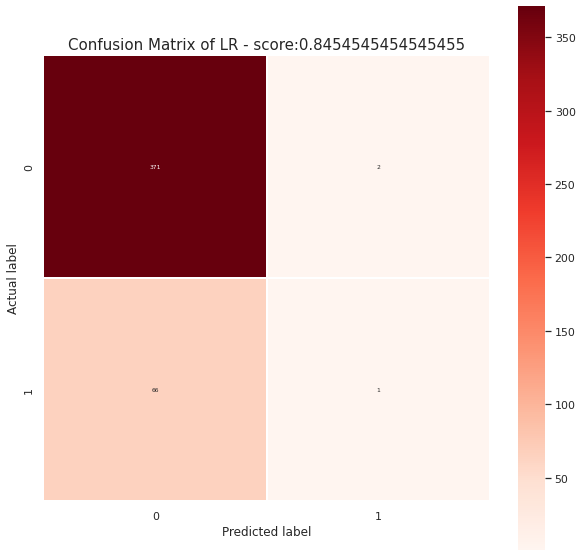

In [134]:
from sklearn.metrics import confusion_matrix
cmlr=confusion_matrix(y_test, pred)

plt.figure(figsize=(10,10))
sns.heatmap(cmlr, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Reds');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
sns.set(font_scale=2)
all_sample_title = 'Confusion Matrix of LR - score:'+str(accuracy_score(y_test,pred))
plt.title(all_sample_title, size = 15);
plt.show()

<b> Comparison Plot

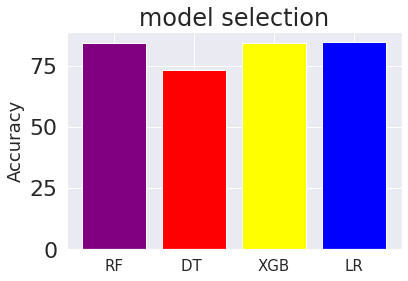

In [135]:
labels = ["RF","DT ", "XGB", "LR"]
usages = [accuracy_RF,accuracy_DT,accuracy_XGB,accuracy_LR]

y_positions = range(len(labels))
plt.bar(y_positions,usages,color=['purple', 'red', 'yellow','blue'])
plt.xticks(y_positions, labels,fontsize= 15)
plt.ylabel("Accuracy",fontsize= 18)
plt.title("model selection")
plt.show()

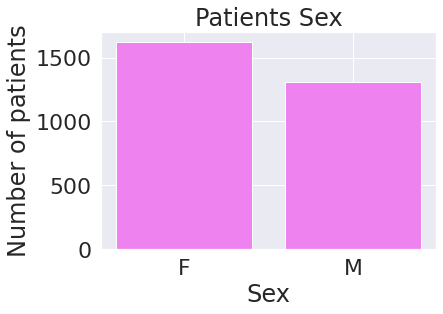

In [136]:
sex_type = risk['sex'].value_counts().rename_axis("Sex").reset_index(name='Count')
sex_cat = sex_type.replace({'Sex': {0 : 'Female', 1: 'Male'}})
plt.bar(sex_type.Sex, sex_type.Count, color = 'violet');
plt.title('Patients Sex');
plt.xlabel('Sex');
plt.ylabel('Number of patients');

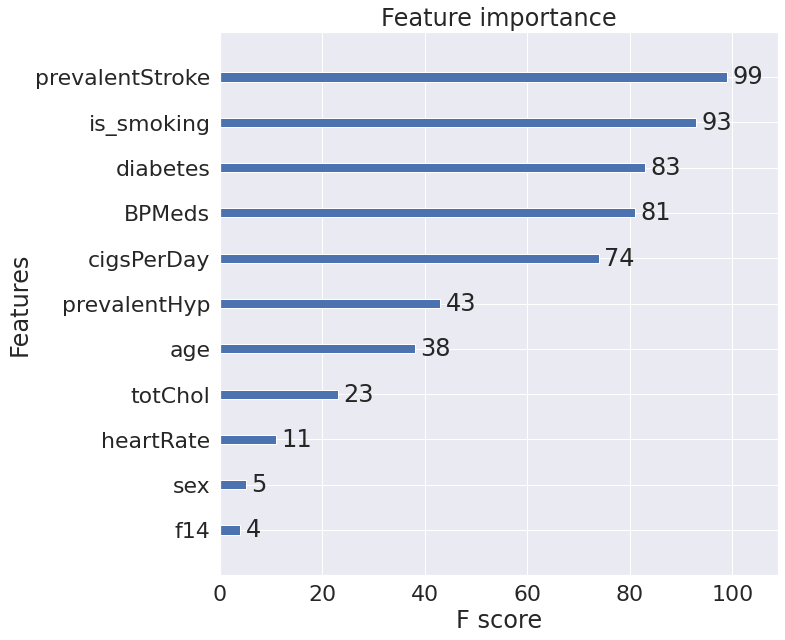

In [138]:
orig_feature_names = list(risk.columns)
orig_feature_names.remove('TenYearCHD')
xgb_clf.get_booster().feature_names = orig_feature_names
ax = xgb.plot_importance(xgb_clf)
ax.figure.set_size_inches(10, 10)
plt.show()

After analysis, most dangerous factor for CHD is prevalent stroke followed by smoking , diabetees, BP and hypertension. Whereas sex category and heartrate is least bothered factor

<b>Conclusion: